1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

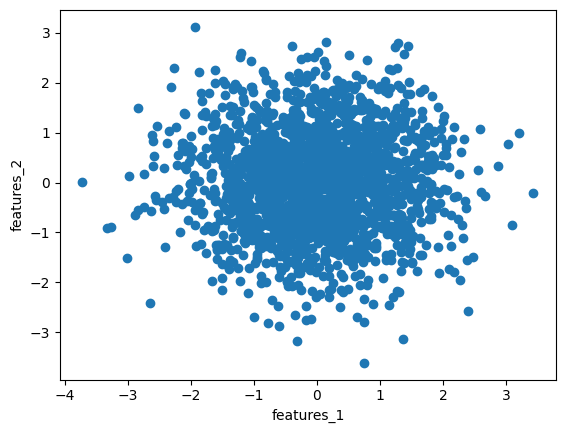

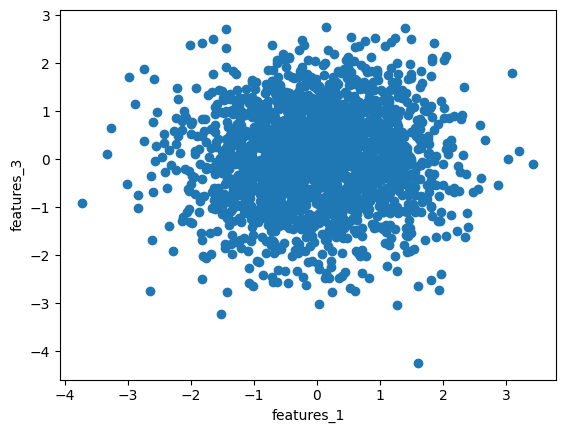

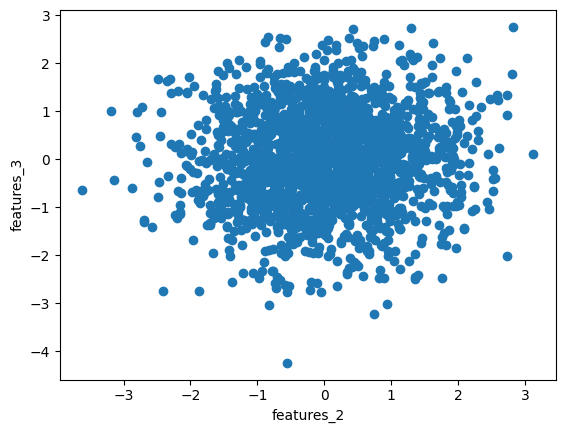

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import scipy
dataframe = pd.read_csv('https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1')

plt.scatter(dataframe['features_1'], dataframe['features_2'])
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()
plt.scatter(dataframe['features_1'], dataframe['features_3'])
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.show()
plt.scatter(dataframe['features_2'], dataframe['features_3'])
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

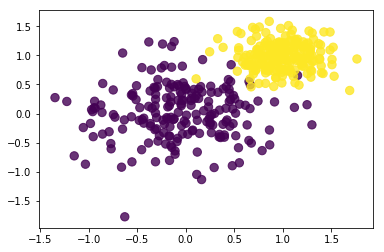

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

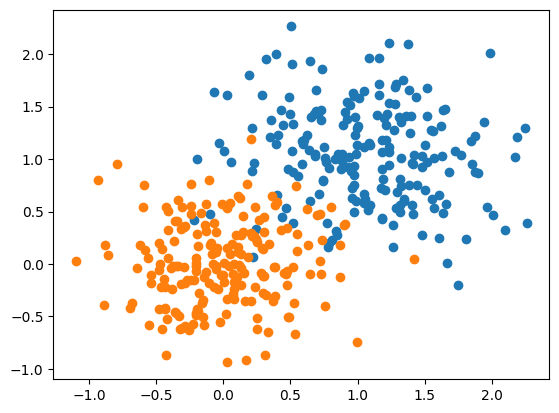

In [3]:
def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,200)

x1 = gaussian(1,0.5)
y1 = gaussian(1,0.5)
plt.scatter(x1,y1)

x2 = gaussian(0,0.4)
y2 = gaussian(0,0.4)
plt.scatter(x2,y2)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
import pandas as pd   
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#load the data into dataframe and conver it to pandas dataframe
data=np.load("C:/Users/sina tavakoli/Desktop/residuals_261.pkl",allow_pickle=True).item()
data=pd.DataFrame(data)
print(data)
print(data.info())

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.1 KB
None


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


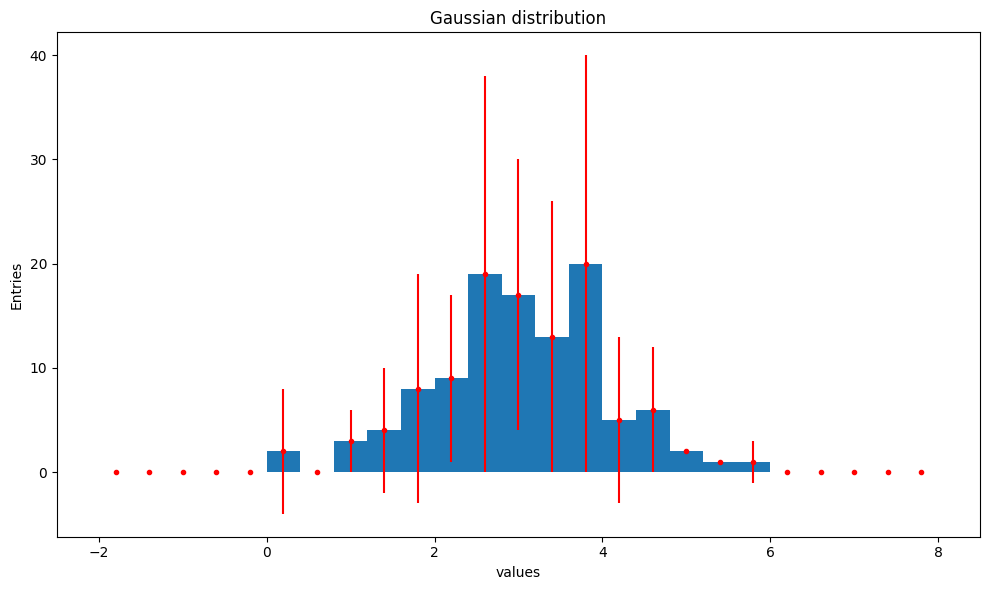

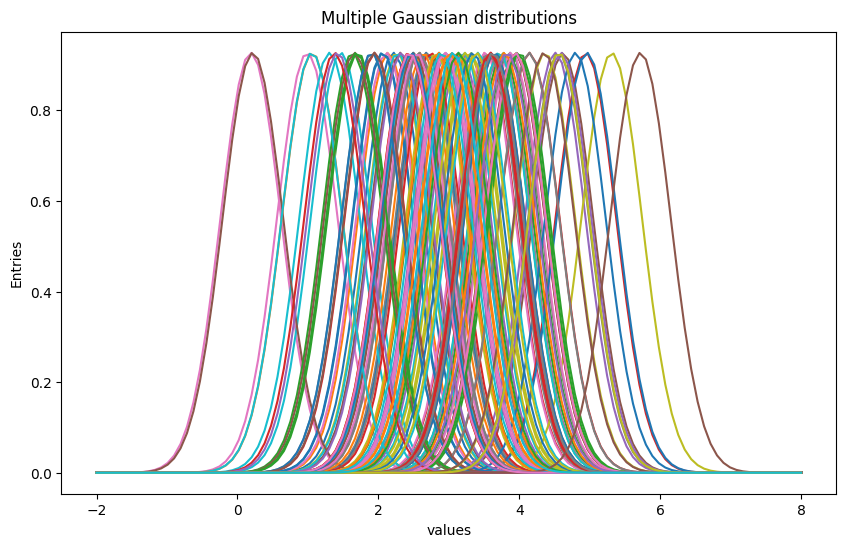

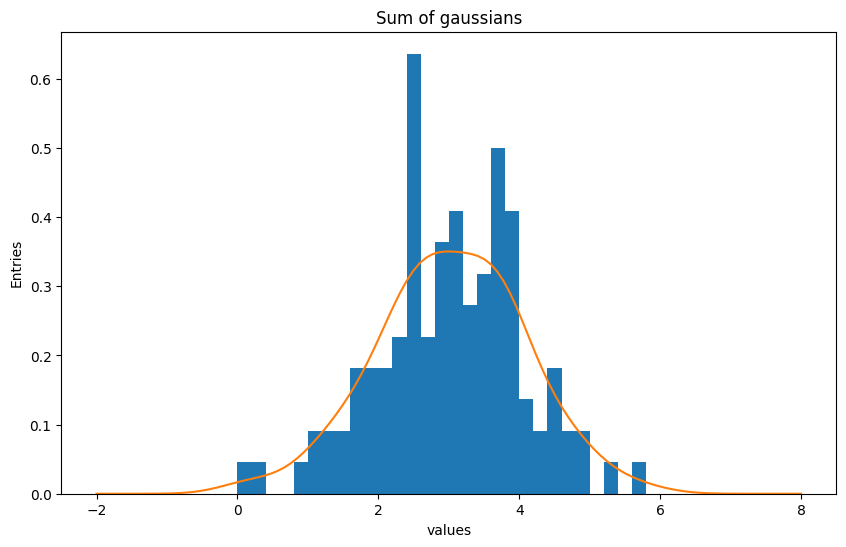

In [5]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

x=np.random.normal(3,1,110)
menStd     = np.sqrt(x)
fig = plt.figure(figsize=(10, 6)) 
#h, bins, _ = plt.hist(x, bins=25, range=(-2,8), density=True, cumulative=False)

#plt.bar(bincenters, y, width=width, color='r', yerr=menStd)
#plt.show()
entries, edges, _ = plt.hist(x, bins=25, range=(-2,8))
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,25), fmt='r.')
ax = fig.axes[0]
ax.set_title('Gaussian distribution')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()
cum=np.zeros(110)
a=[]
fig = plt.figure(figsize=(10, 6)) 
std=1.06*scipy.stats.tstd(x)*(110)**(-0.2)

for el in x:
    t =np.linspace(-2, 8, 110)
    a.append(scipy.stats.norm.pdf(t,el,std) )#sistema std dev
    plt.plot(t,a[-1])
    
ax = fig.axes[0]
ax.set_title('Multiple Gaussian distributions')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()

for val in a:
    for el in range(110):
        cum[el]=cum[el]+val[el]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=50, range=(-2,8), density=True, cumulative=False)
plt.plot(t,cum/110) 
ax = fig.axes[0]
ax.set_title('Sum of gaussians')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()